<font size="+3"><strong> Housing in Brazil 🇧🇷</strong></font>

**Before you start:** Import the libraries you'll use in this project: Matplotlib, pandas, and plotly.

In [53]:
# Import Matplotlib, pandas, and plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Import

First, import and clean the data in `data/brasil-real-estate-1.csv`. 

**Task 1.5.1:** Import the CSV file `brasil-real-estate-1.csv` into the DataFrame `df1`.

In [54]:
df1 = pd.read_csv("data/brasil-real-estate-1.csv")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


**Task 1.5.2:** Drop all rows with `NaN` values from the DataFrame `df1`.

In [55]:
df1.dropna(inplace=True)

**Task 1.5.3:** Use the `"lat-lon"` column to create two separate columns in `df1`: `"lat"` and `"lon"`. Make sure that the data type for these new columns is `float`.

In [56]:
df1[["lat","lon"]] = df1["lat-lon"].str.split(",",expand=True).astype(float)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(3), object(5)
memory usage: 812.2+ KB


**Task 1.5.4:** Use the `"place_with_parent_names"` column to create a `"state"` column for `df1`. (Note that the state name always appears after `"|Brasil|"` in each string.)

In [57]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]

df1.head()

property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2    price_usd       lat        lon    state  
0    110.0  $187,230.85 -9.644305 -35.708814  Alagoas  
1     65.0   $81,133.37 -9.643093 -35.704840  Alagoas  
2    211.0  $154,465.45 -9.622703 -35.729795  Alagoas  
3     99.0  $146,013.20 -9.622837 -35.719556  Alagoas  
4     55.0  $101,416.71 -9.654955 -35.700227  Alagoas

**Task 1.5.5:** Transform the `"price_usd"` column of `df1` so that all values are floating-point numbers instead of strings. 

In [58]:
df1["price_usd"] = df1["price_usd"].str.replace("$", "", regex=False).str.replace(",", "").astype(float)

df1.head()

property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2  price_usd       lat        lon    state  
0    110.0  187230.85 -9.644305 -35.708814  Alagoas  
1     65.0   81133.37 -9.643093 -35.704840  Alagoas  
2    211.0  154465.45 -9.622703 -35.729795  Alagoas  
3     99.0  146013.20 -9.622837 -35.719556  Alagoas  
4     55.0  101416.71 -9.654955 -35.700227  Alagoas

**Task 1.5.6:** Drop the `"lat-lon"` and `"place_with_parent_names"` columns from `df1`.

In [59]:
df1.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)
df1.head()


property_type     region  area_m2  price_usd       lat        lon    state
0     apartment  Northeast    110.0  187230.85 -9.644305 -35.708814  Alagoas
1     apartment  Northeast     65.0   81133.37 -9.643093 -35.704840  Alagoas
2         house  Northeast    211.0  154465.45 -9.622703 -35.729795  Alagoas
3     apartment  Northeast     99.0  146013.20 -9.622837 -35.719556  Alagoas
4     apartment  Northeast     55.0  101416.71 -9.654955 -35.700227  Alagoas

Now that you have cleaned `brasil-real-estate-1.csv` and created `df1`, you are going to import and clean the data from the second file, `brasil-real-estate-2.csv`. 

**Task 1.5.7:** Import the CSV file `brasil-real-estate-2.csv` into the DataFrame `df2`.

In [60]:
df2 = pd.read_csv("data/brasil-real-estate-2.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


**Task 1.5.8:** Use the `"price_brl"` column to create a new column named `"price_usd"`. (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [61]:
df2["price_usd"] = round(df2["price_brl"] / 3.19, 2)

df2.head()

property_type       state     region       lat        lon  area_m2  \
0     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

   price_brl  price_usd  
0  414222.98  129850.46  
1  848408.53  265958.79  
2  299438.28   93867.80  
3  848408.53  265958.79  
4  464129.36  145495.10

**Task 1.5.9:** Drop the `"price_brl"` column from `df2`, as well as any rows that have `NaN` values. 

In [62]:
df2.dropna(inplace = True)
df2.drop(columns = ["price_brl"], inplace = True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_usd      11293 non-null  float64
dtypes: float64(4), object(3)
memory usage: 705.8+ KB


OK! Now that you've cleaned the data from both CSV files and created `df1` and `df2`, it's time to combine them into a single DataFrame.

**Task 1.5.10:** Concatenate `df1` and `df2` to create a new DataFrame named `df`. 

In [63]:
df = pd.concat([df1, df2])

print("df shape:", df.shape)

df.head()

df shape: (22844, 7)


property_type     region  area_m2  price_usd       lat        lon    state
0     apartment  Northeast    110.0  187230.85 -9.644305 -35.708814  Alagoas
1     apartment  Northeast     65.0   81133.37 -9.643093 -35.704840  Alagoas
2         house  Northeast    211.0  154465.45 -9.622703 -35.729795  Alagoas
3     apartment  Northeast     99.0  146013.20 -9.622837 -35.719556  Alagoas
4     apartment  Northeast     55.0  101416.71 -9.654955 -35.700227  Alagoas

## Explore

It's time to start exploring your data. In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.

In [81]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    color="price_usd",
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

C:\Users\youke\AppData\Local\Temp\ipykernel_8364\3045778825.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



**Task 1.5.11:** Use the `describe` method to create a DataFrame `summary_stats` with the summary statistics for the `"area_m2"` and `"price_usd"` columns.

In [65]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

area_m2      price_usd
count  22844.000000   22844.000000
mean     115.020224  194987.315515
std       47.742932  103617.682979
min       53.000000   74892.340000
25%       76.000000  113898.770000
50%      103.000000  165697.555000
75%      142.000000  246900.882500
max      252.000000  525659.720000

**Task 1.5.12:** Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`. Use Matplotlib (`plt`).

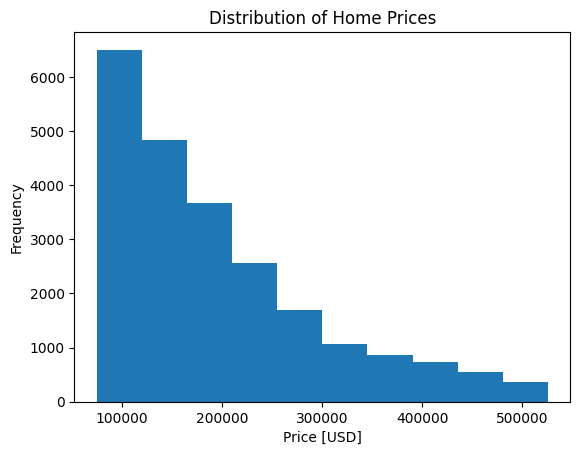

In [66]:
# Build histogram
plt.hist(df["price_usd"])


# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");


**Task 1.5.13:** Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`. Use Matplotlib (`plt`).

Text(0.5, 1.0, 'Distribution of Home Sizes')

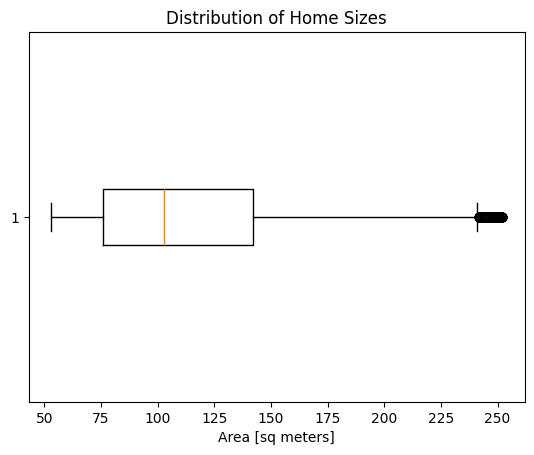

In [67]:
# Build box plot
plt.boxplot(df[ "area_m2"], vert=False)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")


**Task 1.5.14:** Use the `groupby` method to create a Series named `mean_price_by_region` that shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [68]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values(ascending=True).round(2)

mean_price_by_region

region
Central-West    178596.28
North           181308.96
Northeast       185422.99
South           189012.35
Southeast       208996.76
Name: price_usd, dtype: float64

**Task 1.5.15:** Use `mean_price_by_region` to create a bar chart. Make sure you label the x-axis as `"Region"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean Home Price by Region"`. Use pandas. 

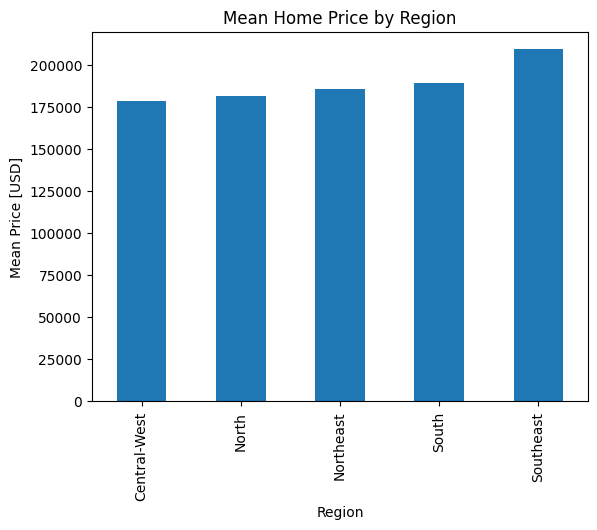

In [69]:
# Build bar chart, label axes, add title
mean_price_by_region.plot(
    kind = "bar", 
    xlabel="Region", 
    ylabel="Mean Price [USD]", 
    title = "Mean Home Price by Region"
);


You're now going to shift your focus to the southern region of Brazil, and look at the relationship between home size and price.

**Task 1.5.16:** Create a DataFrame `df_south` that contains all the homes from `df` that are in the `"South"` region. 

In [70]:
df_south = df[df["region"] == "South"]
df_south.head()

property_type region  area_m2  price_usd        lat        lon   state
9304     apartment  South    127.0  296448.85 -25.455704 -49.292918  Paraná
9305     apartment  South    104.0  219996.25 -25.455704 -49.292918  Paraná
9306     apartment  South    100.0  194210.50 -25.460236 -49.293812  Paraná
9307     apartment  South     77.0  149252.94 -25.460236 -49.293812  Paraná
9308     apartment  South     73.0  144167.75 -25.460236 -49.293812  Paraná

**Task 1.5.17:** Use the `value_counts` method to create a Series `homes_by_state` that contains the number of properties in each state in `df_south`. 

In [71]:
homes_by_state = df_south["state"].value_counts()

homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

**Task 1.5.18:** Create a scatter plot showing price vs. area for the state in `df_south` that has the largest number of properties. Be sure to label the x-axis `"Area [sq meters]"` and the y-axis `"Price [USD]"`; and use the title `"<name of state>: Price vs. Area"`. Use Matplotlib (`plt`).

Correlation score: 0.58


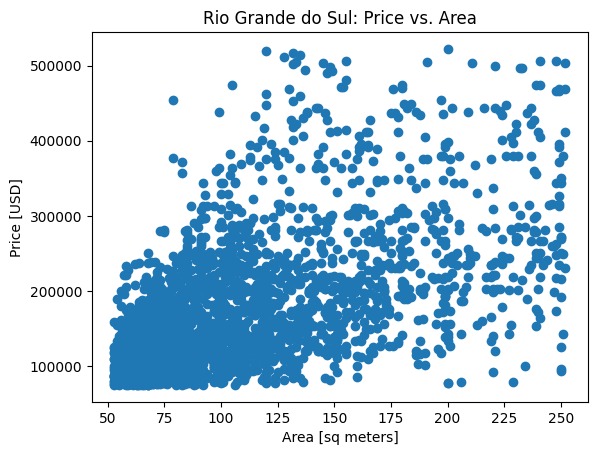

In [72]:
# Subset data
df_south_rgs = df_south[df_south["state"] == "Rio Grande do Sul"]

# Build scatter plot
plt.scatter(x=df_south_rgs["area_m2"], y= df_south_rgs["price_usd"])
print("Correlation score:", df_south_rgs["area_m2"].corr(df_south_rgs["price_usd"]).round(2))

# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
# Add title
plt.title("Rio Grande do Sul: Price vs. Area");


**Task 1.5.19:** Create a dictionary `south_states_corr`, where the keys are the names of the three states in the `"South"` region of Brazil, and their associated values are the correlation coefficient between `"area_m2"` and `"price_usd"` in that state.

In [80]:
# List of the three states in the South region of Brazil
south_states = ["Paraná", "Santa Catarina", "Rio Grande do Sul"]

# Initialize an empty dictionary
south_states_corr = {}

# Calculate correlation for each state and store it in the dictionary
for state in south_states:
    df_state = df_south[df_south["state"] == state]  # Filter data for each state
    correlation = df_state["area_m2"].corr(df_state["price_usd"])  # Calculate correlation
    south_states_corr[state] = float(round(correlation, 2)) # Store rounded correlation in dictionary

# Display the result
south_states_corr

{'Paraná': 0.54, 'Santa Catarina': 0.51, 'Rio Grande do Sul': 0.58}